<a href="https://colab.research.google.com/github/notanhour/denoise/blob/main/blur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from PIL import Image as im, ImageFilter as imfilter
from matplotlib import colors
import numpy as np
import requests

Цвет?

In [5]:
def set_color(color):
  try:
    color = [int(x) for x in (color, color, color)]
  except ValueError:
    color = [int(x * 255) for x in colors.to_rgb(color)]
  return color

Размываем изображение:

In [6]:
def blur(image, radius):
    image = image.filter(imfilter.GaussianBlur(radius))
    array = np.array(image)
    return array

Ты плохой?

In [44]:
def mark(image, bound):
    result = np.zeros_like(image)
    marked = np.sum(image, 2) < bound
    result[marked] = True
    return result

XOR?..

In [19]:
def merge(marked, fuzzy, image):
    result = np.where(marked, fuzzy, image)
    # result = np.where(marked[:, :, np.newaxis], fuzzy, image)
    return result



---



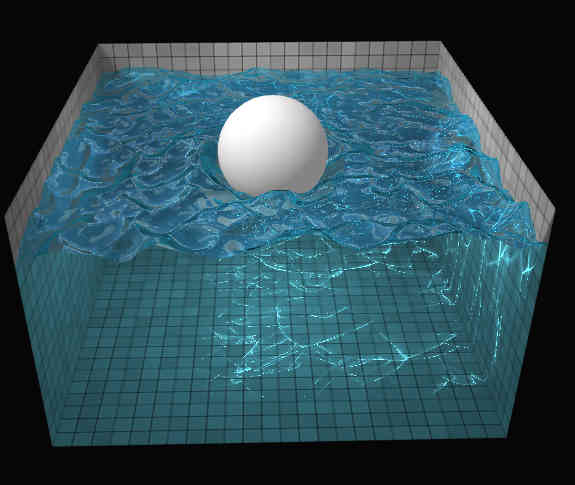

In [47]:
# image = im.open("test.png").convert("RGB")  # локально
url = requests.get("https://github.com/marmust/raytracing_denoiser/blob/main/example_images/ball_in_water.jpg?raw=true", stream=True)  # url
image = im.open(url.raw).convert("RGB")  # ...
width, height = image.size
array = np.array(image)  # изображение в массив (r, g, b)
image  # image.show()

Какой он?

In [ ]:
color = set_color(input("Цвет шума: "))

Цвет шума: 0


Его нет? Добавим!

Количество шума: 20
Цвет шума: black
Шум там, где (r + g + b) < 300


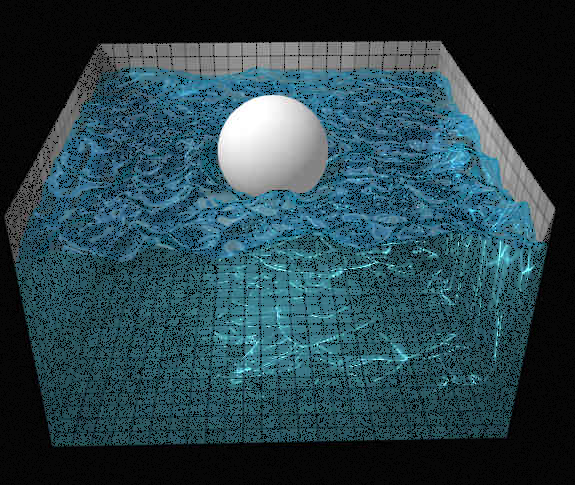

In [48]:
level = int(input("Количество шума: "))  # [1, 100]
color = set_color(input("Цвет шума: "))
maxi = int(input("Шум там, где (r + g + b) < "))
noise = np.random.random(array.shape[:2]) < (level / 100)
rgb = np.sum(image, 2)  # сумма (r, g, b)
array[noise & (rgb < maxi)] = color
image = im.fromarray(array)
image  # image.show()

Долой его!

In [49]:
radius = int(input("Радиус размытия: "))
bound = sum(color) + 10  # шум ниже этого значения
stop = 0  # чем меньше, тем дольше
marked = mark(array, bound)
fuzzy = blur(image, radius)
merged = merge(marked, fuzzy, array)
difference = np.mean(abs(merged - array))
while difference > stop:
    image = im.fromarray(merged)
    bound = np.mean(marked * fuzzy) + 10
    array = merged
    marked = mark(array, bound)
    fuzzy = blur(image, radius)
    merged = merge(marked, fuzzy, array)
    difference = np.mean(abs(merged - array))

Радиус размытия: 2


Ух!

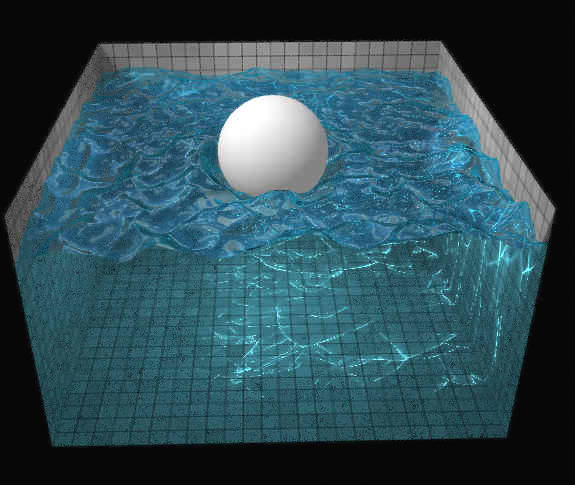

In [50]:
im.fromarray(merged)  # массив в изображение